# Notebook 1: Introduction to Pandas DataFrames & Data Cleaning
***

In this notebook you'll apply some basic Pandas tools to explore DataFrames.


If you haven't completed the Exercises in NB0, **STOP** and go do that now. 

First, as always, we'll load Numpy and Pandas using their common aliases, np and pd. 

In [1]:
import numpy as np 
import pandas as pd

### $\color{red}{\textbf{Pandas}}$ Data Structures

As we introduced in Notebook 0, Pandas has two main types of data structures: 
- The **Series**: A one dimensional array with labeled indices (can be mixed data types). 
- The **DataFrame**: A tabular 2D spreadsheet-like structure with rows and columns (collection of series having the same index). 

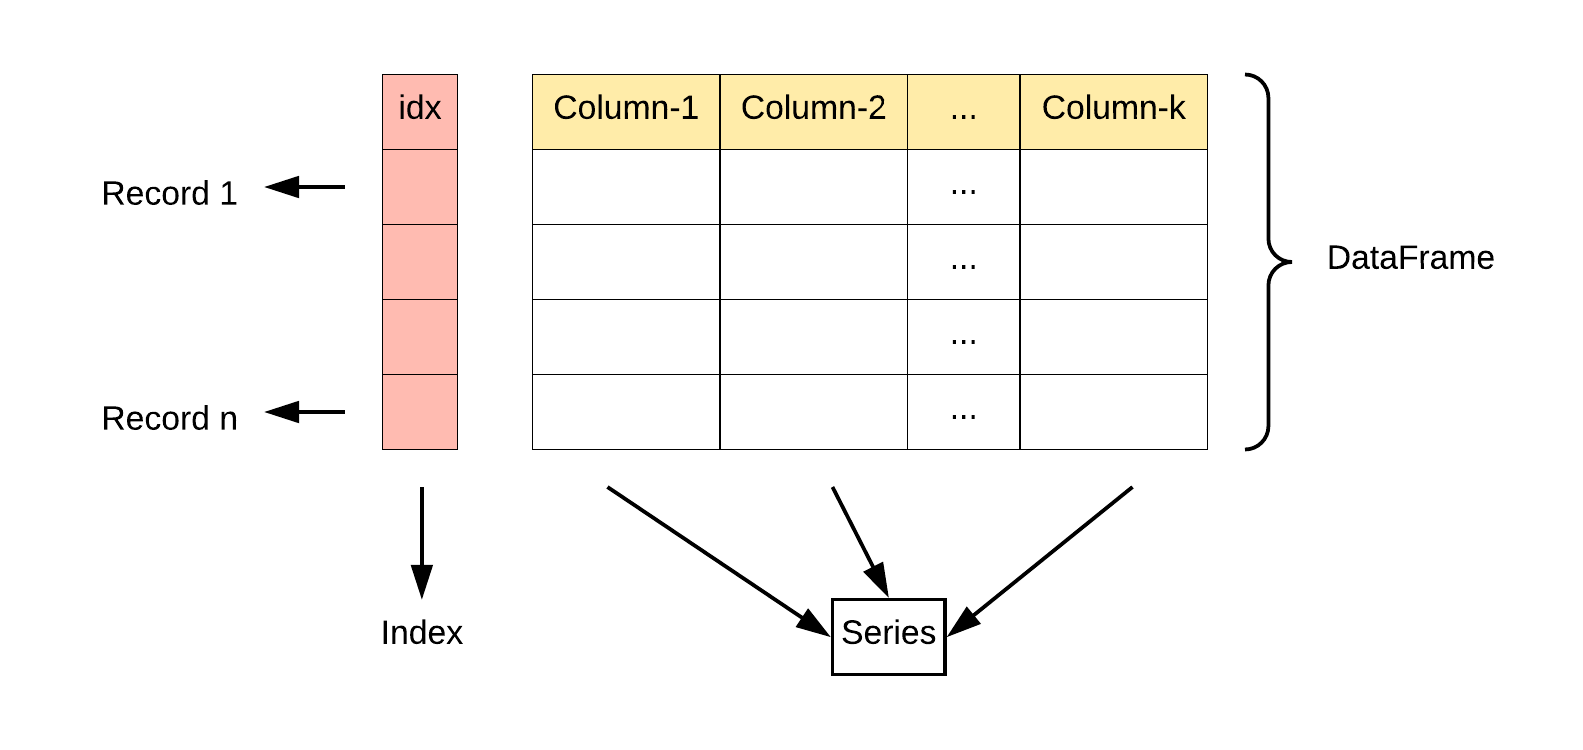


##  I).  The Pandas $\color{red}{\textbf{DataFrame}}$

The key data structure in Pandas is the **DataFrame** object. A DataFrame is basically a tabular data structure, with rows and columns. 

$\color{Green}{\text{Rows}}$ have a specific index to access them, which can be $\color{green}{\text{any name or value}}$. The $\color{green}{\text{columns}}$ are just $\color{blue}{\text{Pandas Series}}$. The Pandas DataFrame data structure can be seen as a spreadsheet, but it is much more flexible. 



There are a variety of built-in methods available for computations with Pandas DataFrames.
https://pandas.pydata.org/docs/reference/frame.html



### A) Creating a DataFrame

There are several options for how to create DataFrames in Pandas:

#### Option 1: Create a DataFrame from a Python dictionary
#### Option 2:  Import data from a .csv into a Pandas DataFrame.
#### Option 3:  Create a DataFrame from a list or Numpy Array

***
We'll start with Option 1 - creating a DataFrame from scratch by passing in a Python dictionary: 

The following data records the records of three Spanish soccer teams during the years 2010-2013: 



In [2]:
data = {'losses': [2, 3, 2, 4, 2, 5, 9, 11, 11],
        'year': [2010, 2011, 2012, 2010, 2011, 2012, 2010, 2011, 2012],
        'team': ['FCBarcelona', 'FCBarcelona', 'FCBarcelona', 'RMadrid', 'RMadrid', 'RMadrid', 'ValenciaCF',
                 'ValenciaCF', 'ValenciaCF'],
        'wins':   [30, 28, 32, 29, 32, 26, 21, 17, 19],
        'draws':  [6, 7, 4, 5, 4, 7, 8, 10, 8]
        }

We'll convert this data to a Pandas DataFrame as follows: 

In [3]:
# dfSoccer is a Pandas dataframe created from
#  a Python dictionary called 'data'.
dfSoccer = pd.DataFrame(data)
print(dfSoccer)


print(type(dfSoccer))

   losses  year         team  wins  draws
0       2  2010  FCBarcelona    30      6
1       3  2011  FCBarcelona    28      7
2       2  2012  FCBarcelona    32      4
3       4  2010      RMadrid    29      5
4       2  2011      RMadrid    32      4
5       5  2012      RMadrid    26      7
6       9  2010   ValenciaCF    21      8
7      11  2011   ValenciaCF    17     10
8      11  2012   ValenciaCF    19      8
<class 'pandas.core.frame.DataFrame'>


Note that $\color{blue}{\text{each list in the dictionary has become a column}}$ in our DataFrame with the associated dictionary key as the column name (header).  

Now, the order that the columns are situated is a little weird.  
If instead we want the columns in the order _year_, _team_, _wins_, _draws_, _losses_ we can pass this ordering of the columns in when we create the DataFrame. 

In [4]:
dfSoccer = pd.DataFrame(data, columns=['year', 'team', 'wins', 'draws', 'losses'])
dfSoccer

,year,team,wins,draws,losses
0,2010,FCBarcelona,30,6,2
1,2011,FCBarcelona,28,7,3
2,2012,FCBarcelona,32,4,2
3,2010,RMadrid,29,5,4
4,2011,RMadrid,32,4,2
5,2012,RMadrid,26,7,5
6,2010,ValenciaCF,21,8,9
7,2011,ValenciaCF,17,10,11
8,2012,ValenciaCF,19,8,11


Sidenote: By default the indices are labeled from 0 to 8.  If we wanted to define other indices (including strings) we could use the `set_index` method:
`DataFrame.set_index(keys, drop=True, append=False, inplace=False, verify_integrity=False)`

For now we will leave the default indices.

### B).  Viewing Data in DataFrames:

The most useful methods for viewing dataframes are `.head()` and `.info()`

 

In [5]:
#If we want to see the first 5 rows of the DataFrame we can use the .head() method:
dfSoccer.head()

#If you want to see the first n rows you can input n as the argument:
#dfSoccer.head(7)



,year,team,wins,draws,losses
0,2010,FCBarcelona,30,6,2
1,2011,FCBarcelona,28,7,3
2,2012,FCBarcelona,32,4,2
3,2010,RMadrid,29,5,4
4,2011,RMadrid,32,4,2


The `.info()` method gives an overview of the dataframe and the data types in each column:

In [6]:
dfSoccer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    9 non-null      int64 
 1   team    9 non-null      object
 2   wins    9 non-null      int64 
 3   draws   9 non-null      int64 
 4   losses  9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


### C) Adding Columns to Pandas DataFrames

In many sporting events it is customary to rank the performances of different teams by taking a weighted sum of the win, loss, and draws in a season.  In particular, it is customary to award 3 points for each win, 1 point for each draw, and 0 points for each loss.  Let's compute this point total for each team-season combination stored in the data frame, and store it in a $\color{blue}{\text{new column}}$ called **points**. 
We can do this as follows:

In [7]:
#Create a column called 'points' and then indicate what to store in it
dfSoccer["points"] = 3*dfSoccer["wins"] + 1*dfSoccer["draws"] + 0*dfSoccer["losses"]
dfSoccer.head()

,year,team,wins,draws,losses,points
0,2010,FCBarcelona,30,6,2,96
1,2011,FCBarcelona,28,7,3,91
2,2012,FCBarcelona,32,4,2,100
3,2010,RMadrid,29,5,4,92
4,2011,RMadrid,32,4,2,100


There are several takeaways from this exercise:  

$\color{green}{\text{First, if we want to create a new column in our DataFrame,}}$
$\color{green}{\text{  we simply have to assign the DataFrame indexed by}}$
$\color{green}{\text{the new column name to some valid Panda Series.}}$  

$\color{blue}{\text{The second takeaway is that we can scale and}}$
$\color{blue}{\text{   add Pandas Series in the same way we can with Numpy arrays.}}$ 

### D). Sorting in Pandas

##### <span style = 'color: Red' >Exercise 1a: </span>

 <span style='color:Red'> Suppose we want to rank the team-season combinations from greatest to least number of points.  One way we could do this would be to sort the DataFrame by the **points** column.  Use the hyperlink to the DataFrame methods reference (at the top) to find the method that will do this.  
Then create a new sorted dataframe called </span> `dfSoccer_sorted`


In [8]:
dfSoccer_sorted = dfSoccer.sort_values(by="points", ascending=False)

# Now, lets look at it.
dfSoccer_sorted

,year,team,wins,draws,losses,points
2,2012,FCBarcelona,32,4,2,100
4,2011,RMadrid,32,4,2,100
0,2010,FCBarcelona,30,6,2,96
3,2010,RMadrid,29,5,4,92
1,2011,FCBarcelona,28,7,3,91
5,2012,RMadrid,26,7,5,85
6,2010,ValenciaCF,21,8,9,71
8,2012,ValenciaCF,19,8,11,65
7,2011,ValenciaCF,17,10,11,61


It looks like it's a tie between 2012 FC Barcelona and 2011 Real Madrid.  

There are a couple of things to notice here.  First, the $\color{green}{\text{sort_values method actually returns a new DataFrame}}$, with the data sorted as requested.  If instead we wanted to modify the existing DataFrame so that it's values are sorted we could have added the $\color{green}{\text{"inplace=True" parameter}}$ to the sort_values method.  For now though we'll leave the original football DataFrame as it is. 

The second interesting thing to notice is that the DataFrame indices (the first column) have been rearranged as well.  In truth, the $\color{blue}{\text{indices of a DataFrame are only numbers by default.}}$  We could also set them to be other unique identifiers like strings.  In that setting, in makes perfect sense that they should tag along with their original data. 

### E).  Slicing and Dicing Pandas DataFrames

The sorted soccer DataFrame gives us an opportunity to talk about the intricacies of selecting data from Pandas DataFrames.  

There are two main methods that we will use to slice and dice data from DataFrames: $\texttt{loc}$ and $\texttt{iloc}$. 

We'll explicitly write down the differences between $\texttt{loc}$ and $\texttt{iloc}$ here, because it's a bit hard to remember:

- $\texttt{loc}$ slices rows and columns by their **names** 
- $\texttt{iloc}$ slices rows and columns by their **integer index order**, much like slicing in Numpy 

At first, we'll just worry about selecting certain rows.  

Shift-enter these two cells and see if you can pick up on the different behaviors:

In [9]:
dfSoccer_sorted.iloc[:3]

,year,team,wins,draws,losses,points
2,2012,FCBarcelona,32,4,2,100
4,2011,RMadrid,32,4,2,100
0,2010,FCBarcelona,30,6,2,96


In [10]:
dfSoccer_sorted.loc[:3]

,year,team,wins,draws,losses,points
2,2012,FCBarcelona,32,4,2,100
4,2011,RMadrid,32,4,2,100
0,2010,FCBarcelona,30,6,2,96
3,2010,RMadrid,29,5,4,92


Do you see the difference?  $\texttt{iloc[:3]}$ sliced out the first 3 rows of the DataFrame, **ignoring what the rows happened to be named**. 

On the other hand,  $\texttt{loc[:3]}$ sliced out the rows in the sorted DataFrame from the beginning until we found the row **named** 3 by it's index. 


#### <span style = 'color: Red' >Exercise 1b: </span>  

<span style ='color: Red'> Predict what the following code will output.  Then check by running it:

In [11]:
#Predict what the following will return:
dfSoccer_sorted.iloc[:4,:3]


,year,team,wins
2,2012,FCBarcelona,32
4,2011,RMadrid,32
0,2010,FCBarcelona,30
3,2010,RMadrid,29


`.iloc[a,b]` gives the  first `a` rows of the DataFrame, and the first `b` colums.  

Now, suppose that we want to mix slicing by numerical order and slicing by name.  
This can get kinda tricky. For instance, suppose we wanted the first four rows of the DataFrame, and just the columns corresponding to **team** and **points**.  So we're really doing two slices: one by integer index order, and one by name.

The best way to do this is use $\texttt{loc}$ and then use a trick to get the named indices of the first four rows.  We can do this as follows: 

In [12]:
dfSoccer_sorted.loc[dfSoccer_sorted.index[:4], ["team", "points"]]

,team,points
2,FCBarcelona,100
4,RMadrid,100
0,FCBarcelona,96
3,RMadrid,92


This worked because $\texttt{dfSoccer_sorted.index[:4]}$ $\color{blue}{\text{returns the names of the first four rows}}$, which you can check here

In [13]:
dfSoccer_sorted.index[:4]

Int64Index([2, 4, 0, 3], dtype='int64')

One **INADVISABLE** way to do this is to chain multiple calls to $\texttt{iloc}$ and $\texttt{loc}$ together. The problem with this is that the actual object that is returned by this can be unpredictable.  We won't go into too much detail about this, but if you're interested in reading more, you can do so in the Pandas documentation [here](https://pandas.pydata.org/pandas-docs/stable/indexing.html#returning-a-view-versus-a-copy). Rest assured, if you ever go this route, Pandas will scream a lot of fun warnings at you. 


In [14]:
#WARNING:  DON'T CHAIN LOC/ILOC TOGETHER LIKE THIS
dfSoccer_sorted.iloc[:4].loc[:,["team", "points"]]

,team,points
2,FCBarcelona,100
4,RMadrid,100
0,FCBarcelona,96
3,RMadrid,92


(Sidenote:  In this particular example it actually works because $\texttt{dfSoccer_sorted.iloc[:4]}$ returns a DataFrame which we then apply $\texttt{loc[:,["team", "points"]]}$ to.   But again, the actual object returned by this can be unpredictable).

#### Selecting Rows Based on Conditions:  
We can also select rows of a DataFrame using conditions, much like you can do with Numpy arrays. 

For this, let's go back to the original unsorted 𝚍𝚏𝚂𝚘𝚌𝚌𝚎𝚛 DataFrame.

Suppose we want to select all of the team-year combinations where the total number of points was greater than 95.  Much like in Numpy, we can simply write down a logical comparison of the **points** column with the desired value. 

In [15]:
dfSoccer["points"] > 95

0     True
1    False
2     True
3    False
4     True
5    False
6    False
7    False
8    False
Name: points, dtype: bool

In this case, what we get out is a Pandas Series with boolean values, indicating whether each row of the DataFrame passes the condition. We can then pass this into the $\texttt{loc}$ method to get all of the rows of the DataFrame that satisfy the condition. 

In [16]:
dfSoccer.loc[dfSoccer["points"] > 95]
# 'loc' shows the rows you want to see.

,year,team,wins,draws,losses,points
0,2010,FCBarcelona,30,6,2,96
2,2012,FCBarcelona,32,4,2,100
4,2011,RMadrid,32,4,2,100


Note that technically we could have just passed the condition into the DataFrame itself (shown below). 

In [17]:
dfSoccer[dfSoccer["points"] > 95]

,year,team,wins,draws,losses,points
0,2010,FCBarcelona,30,6,2,96
2,2012,FCBarcelona,32,4,2,100
4,2011,RMadrid,32,4,2,100


The problem with this, is that if we decide we only want to see the _year_ and _team_ columns associated with this condition, we're now motivated to create a dastardly selection chain, which we just decided we shouldn't do.  Instead we'll use the safe $\texttt{loc}$ method. 

In [18]:
dfSoccer.loc[dfSoccer["points"] > 95, ["year", "team"]]

,year,team
0,2010,FCBarcelona
2,2012,FCBarcelona
4,2011,RMadrid


We can also combine logical conditions together.

**Logical Operators**: We can use the following logical operators when working with dataframes:


NOT `~`

AND `&`

OR `|`

XOR `^`




##### <span style='color:Red'> Exercise1c:  Write code to locate any teams scored more than $95$ points in the years 2011 or 2012.  </span>

In [19]:
dfSoccer.loc[(dfSoccer["points"] > 95) & (dfSoccer["year"] >= 2011), ["year", "team"]]

,year,team
2,2012,FCBarcelona
4,2011,RMadrid


### F). Manipulating Data 


There are a variety of built-in methods available for computations with Pandas DataFrames.
https://pandas.pydata.org/docs/reference/frame.html


<span style='color:Red'>   
 Exercise 1d: Play around with the following methods on your soccer dataframe: </span>

`.abs()`,  `.round()`,  `.min()`, `.product()` , `.sum()`




In [20]:
#Round to the nearest 10 (5's are rounded down)
dfSoccer["points"].round(-1)



0    100
1     90
2    100
3     90
4    100
5     80
6     70
7     60
8     60
Name: points, dtype: int64

In [21]:
#Notice **this does not change the original dataframe**.
dfSoccer["points"]

0     96
1     91
2    100
3     92
4    100
5     85
6     71
7     61
8     65
Name: points, dtype: int64


Oftentimes we want to apply mathematical functions element-wise to columns or entire chunks of a DataFrame. 

We can do this with the $\texttt{apply()}$ function. If you're familiar with Python's $\texttt{map()}$ function, it's very similar. 

Let's suppose, for whatever reason, you want to know the square root of the number of points for each team-season combination.  We can do this by using the $\texttt{apply()}$ function on the **points** column with Numpy's square root function as the argument. 

In [22]:
dfSoccer["points"].apply(np.sqrt)

0     9.797959
1     9.539392
2    10.000000
3     9.591663
4    10.000000
5     9.219544
6     8.426150
7     7.810250
8     8.062258
Name: points, dtype: float64

Note that this applies the function $\texttt{np.sqrt()}$ to each entry in the **points** Series, and returns a Pandas series as a result. 

Notice **this does not change the original dataframe**.  If we had wanted to replace the "points" column with its square root we would have used:

`dfSoccer["points"] = dfSoccer["points"].apply(np.sqrt)`



Sometimes we want to apply our own cooked up functions to elements of a Series.  We can do this using Python $\texttt{lambda}$ functions.  

As a simple example, let's suppose we want to square every element in the **points** column and subtract 3.  We do this like so 

In [23]:
dfSoccer["points"].apply(lambda x: x**2 - 3)

0    9213
1    8278
2    9997
3    8461
4    9997
5    7222
6    5038
7    3718
8    4222
Name: points, dtype: int64

A $\texttt{lambda}$ function is a function without a name. The variable after the **lambda** is simply a dummy variable representing the element of the series being passed to the function.  The part after the **:** specifies what the function should do to the input variable.  

$\texttt{lambda}$ functions are particularly useful for doing string manipulation.  Suppose for instance we wanted to convert all of the team names from the **team** column to lowercase.  For this we'll use a $\texttt{lambda}$ function and $\texttt{apply}$ to apply the $\texttt{lower()}$ method to each team name.  

In [24]:
dfSoccer["team"].apply(lambda s: s.lower())

0    fcbarcelona
1    fcbarcelona
2    fcbarcelona
3        rmadrid
4        rmadrid
5        rmadrid
6     valenciacf
7     valenciacf
8     valenciacf
Name: team, dtype: object

## II).  Data Cleaning

***
Next we'll explore the Pandas DataFrame using the ubiquitous **Titanic** dataset from Kaggle (https://www.kaggle.com/competitions/titanic).

### A).  Importing .csv into a DataFrame

The data we'll use is stored in a .csv file (a format that lists data separated by commas) called dirty_titanic_data.csv.  We'll import the data into Pandas using the read_csv( ) function.  

In [25]:
file_path = 'dirty_titanic_dataNB1.csv'
dfDirtyT = pd.read_csv(file_path)

# Inspect some of the data
dfDirtyT.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22yrs,1,0,A/5 21171,£7.5s,NaN,S
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38yrs,1,0,PC 17599,£71.5s,C85,C
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26yrs,0,0,STON/O2. 3101282,£7.18s,NaN,S
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35yrs,1,0,113803,£53.2s,C123,S
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35yrs,0,0,373450,£8.1s,NaN,S


### B).  Getting a Lay of the Land

<span style='color:Red'> Exercise 2a:  Take a look at the first 10 rows of the Titanic DataFrame:  </span>


In [26]:


dfDirtyT.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22yrs,1,0,A/5 21171,£7.5s,NaN,S
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38yrs,1,0,PC 17599,£71.5s,C85,C
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26yrs,0,0,STON/O2. 3101282,£7.18s,NaN,S
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35yrs,1,0,113803,£53.2s,C123,S
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35yrs,0,0,373450,£8.1s,NaN,S
5,6,0.0,3.0,"Moran, Mr. James",male,NaN,0,0,330877,£8.9s,NaN,Q
6,7,0.0,NaN,"McCarthy, Mr. Timothy J",male,54yrs,0,0,17463,£51.17s,E46,S
7,8,0.0,3.0,"Palsson, Master. Gosta Leonard",male,2yrs,3,1,349909,£21.1s,NaN,S
8,9,1.0,3.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27yrs,0,2,347742,£11.2s,NaN,S
9,10,1.0,2.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,14yrs,1,0,237736,£30.1s,NaN,C


From this you should see that each row in the DataFrame refers to a particular passenger on the Titanic.  The columns of the DataFrame give you specific information about each passenger.  The **PassengerId** is simply a unique identifier given to each passenger in the data set.  The rest of the attributes are more meaningful: 

- **Survived**: Indicates whether the passenger survived the sinking
- **Pclass**: Indicates the socio-economic status of the passenger (lower number means higher class)
- **Name**: The passenger's name 
- **Sex**: The passenger's sex 
- **Age**: The passenger's age
- **SibSp**: The number of siblings / spouses the passenger was traveling with 
- **Parch**: The number of children / parents the passenger was traveling with 
- **Ticket**: The passenger's ticket number 
- **Fare**: How much the passenger paid for their ticket. Given in the form  ¬£7.5s, where 7 is the number of pounds and 5 is the number of shillings.
- **Embarked**: The passenger's port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)







OK, first let's get the lay of the land.  It's almost guaranteed that in any real-world data set you're going to have some values that are simply missing.  Another common occurrence is that values that really should be of numerical type are loaded into Pandas as strings instead of ints or floats.  

<span style='color:Red'> Exercise 2b:  There were a total of 2224 passengers on the titanic.  This dataset is a sample.  
Determine how many passengers are in this dataset.   Then determine the data types of each column and whether any of the columns have null values.  Do any of the columns have data types that are contrary to what you would expect? </span>
    

In [27]:


dfDirtyT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     861 non-null    float64
 2   Pclass       849 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


From this we can see that there are $\color{red}{891}$ total rows in the DataFrame.  

Furthermore, the info( ) function gives us a report about how many non-missing (non-null) values we have in each column.  For instance, it appears that each row in the DataFrame contains a valid **Name** entry, but only $\color{red}{861}$ rows have a valid **Survived** entry.  Other columns that are missing data are **Pclass**, **Age**, **Cabin** and **Embarked**. 

Finally, the last column of the report from info( ) tells us the data type of the non-missing entries.  Note that, as expected, **SibSp** and **Parch** are recorded as integers.  If a data type is reported as _object_ then this typically indicates a _string_ in Pandas.  





Notice the data types for **Age** and **Fare**:
We would expect these to be ints or floats, but Pandas is telling us that they are strings.  A closer inspection of the call to head( ) above shows that some knucklehead has formatted **Age** as a string with a number and the abbreviation "yrs".  Furthermore, the **Fare** is given as a string reporting the cost of the ticket in English pounds and shillings. If we want to compute summary statistics on these columns we're going to have to convert them to numerical types.  



### C).  Deleting Unnecessary or Missing Data

But first, let's take care of the $\color{red}{\text{missing data}}$.  Notice that **Cabin** is missing so many values that the entire column is unlikely to be useful.  We can delete an entire column of a DataFrame in place as follows:

In [28]:
del dfDirtyT["Cabin"]
dfDirtyT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     861 non-null    float64
 2   Pclass       849 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 76.7+ KB


You can see from the new call to info( ) that the **Cabin** column is no more.  

We're still missing values in **Survived**, **Pclass**, **Age**, and **Embarked**.  If we have enough data, we might consider deleting every row in the DataFrame that contains any missing values.  We can do so with the .dropna( ) function. But in this case, we have plans for the missing values in the **Age** column.  To drop all rows with missing values in a _subset_ of the columns, we can pass the **subset** parameter to .dropna( ) along with a list of column names of the subset.  

Let's do that now using the subset **Survived**, **Pclass**, and **Embarked** and store the result in a NEW DataFrame called dfTitanic.

pandas `.copy` documentation:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html

In [29]:
dfTitanic = dfDirtyT.dropna(subset=["Survived", "Pclass", "Embarked"]).copy()
dfTitanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  819 non-null    int64  
 1   Survived     819 non-null    float64
 2   Pclass       819 non-null    float64
 3   Name         819 non-null    object 
 4   Sex          819 non-null    object 
 5   Age          653 non-null    object 
 6   SibSp        819 non-null    int64  
 7   Parch        819 non-null    int64  
 8   Ticket       819 non-null    object 
 9   Fare         819 non-null    object 
 10  Embarked     819 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 76.8+ KB


Here we see that that DataFrame has been reduced to 819 rows and that all columns except for Age have their full complement of values. 

In [30]:
dfTitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22yrs,1,0,A/5 21171,£7.5s,S
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38yrs,1,0,PC 17599,£71.5s,C
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26yrs,0,0,STON/O2. 3101282,£7.18s,S
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35yrs,1,0,113803,£53.2s,S
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35yrs,0,0,373450,£8.1s,S


### D).  Cleaning/Updating Data types

We'll come back to the Age column in a bit, but for now let's look at how we might deal with the Fare column. 

Almost anything useful we could do with the Fare column is going to require it being formatted as a numerical value. We can accomplish this by calling .apply( ) on the Fare column and passing in a custom made function that unravels the string and replaces it with a float. We'll write such a function here and explain how it works in the comments.  

Note since there are 20 shillings in a pound we also need to convert the number of shillings into the correct fraction of a pound. 

In [31]:
def fix_fare(val):
    
    # For safety, if the passed value is missing, don't change it 
    if pd.isnull(val):
        return val 
    
    # With strings, it's a good idea to call strip() to remove
    # leading or trailing white space 
    stripped_val = val.strip()
    
    # Use string.replace( ) to replace the non numerical characters 
    # with blanks ('').  Note that '\u00A3' is the unicode character for
    # the English pound sign 
    num_str = stripped_val.replace('\u00A3', '').replace('s','')
    
    # After replacing the errant characters, we still have a string 
    
    #Split the string using the decimal point
    
    [pounds,shillings]=num_str.split('.')
    
    #Convert pounds string to floating point value
    pounds_num=float(pounds)
    
    #Convert shillings string to floating point value and then convert to fraction of pound
    shillings_frac=float(shillings)/20
    
    num=pounds_num+shillings_frac
    

    
    return num 

Next, we'll call the .apply( ) function on the Fare column and pass in our string-to-number function

In [32]:
dfTitanic.loc[:, "Fare"] = dfTitanic.loc[:,"Fare"].apply(fix_fare)
dfTitanic.head()

/tmp/ipykernel_696/2955599239.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dfTitanic.loc[:, "Fare"] = dfTitanic.loc[:,"Fare"].apply(fix_fare)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22yrs,1,0,A/5 21171,7.25,S
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38yrs,1,0,PC 17599,71.25,C
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26yrs,0,0,STON/O2. 3101282,7.90,S
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35yrs,1,0,113803,53.10,S
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35yrs,0,0,373450,8.05,S


From the call to .head( ) it looks as if we successfully transformed the strings into floats, but it's a good idea to call .info( ) again and confirm

In [33]:
dfTitanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  819 non-null    int64  
 1   Survived     819 non-null    float64
 2   Pclass       819 non-null    float64
 3   Name         819 non-null    object 
 4   Sex          819 non-null    object 
 5   Age          653 non-null    object 
 6   SibSp        819 non-null    int64  
 7   Parch        819 non-null    int64  
 8   Ticket       819 non-null    object 
 9   Fare         819 non-null    float64
 10  Embarked     819 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 76.8+ KB


And it looks like we were successful because **Fare** is now of type float64. 
 

#####  <span style='color:Red'> Exercise 2c:  Write a function fix_age that replaces string values with numeric values, then replace the **Age** column by calling .apply( ) on it and passing in your function </span>

In [34]:
def fix_age(val):
    
    if pd.isnull(val):
        return val
    
    stripped_val = val.strip()
    num_str = stripped_val.replace('yrs','')
    num = float(num_str)
    num=round(num,2)
    return num 

dfTitanic.loc[:,"Age"] = dfTitanic.loc[:,"Age"].apply(fix_age)
dfTitanic.head()

/tmp/ipykernel_696/1593604134.py:12: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dfTitanic.loc[:,"Age"] = dfTitanic.loc[:,"Age"].apply(fix_age)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.25,C
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.90,S
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,S
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,S




#####  <span style='color:Red'> Exercise 2d:  Suppose we'd rather have a column that actually has the port of departure rather than the single-letter code listed in **Embarked**. Write a function initial_to_name to convert **Embarked** initials into the name of the port and create the column **Departure Port** by passing initial_to_name to the .apply( ) function. </span>

As a reminder, here are the port codes: C = Cherbourg, Q = Queenstown, S = Southampton.

In [35]:
def initial_to_name(init):
    
    if pd.isnull(init):
        return init 
    
    if init == "C":
        return "Cherbourg"
    
    if init == "Q":
        return "Queenstown"
    
    if init == "S":
        return "Southampton"

dfTitanic.loc[:, "Departure Port"] = dfTitanic.loc[:, "Embarked"].apply(initial_to_name)
dfTitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Departure Port
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,Southampton
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.25,C,Cherbourg
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.90,S,Southampton
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,S,Southampton
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,S,Southampton


### E). Data Imputation in Pandas 
***

Data **imputation** is the process of replacing missing values with $\color{blue}{\text{reasonable guesses}}$ based on other information that you know.  A word of warning: **great care** must be taken when undertaking data imputation because replacing missing values with unreasonable things can cause problems in downstream in your pipeline.  

We demonstrate the process here for the missing **Age** values just so you can see how the process works. In order to proceed with this example, you first need to make sure that you have successfully completed **Exercise 2c**. 

One way that we might infer the age of a passenger is by looking at the salutation that is given in their name (by _salutation_ we mean things like "Mr", "Mrs", etc). A cursory look through the **Name** column reveals that the most common salutations are "Mr", "Mrs", "Miss", and "Master"). 

In [36]:
print("Occurances of {}: {}".format("Master", np.sum(dfTitanic["Name"].str.contains("Master"))))
print("Occurances of {}: {}".format("Miss", np.sum(dfTitanic["Name"].str.contains("Miss"))))
print("Occurances of {}: {}".format("Mrs", np.sum(dfTitanic["Name"].str.contains("Mrs"))))
print("Occurances of {}: {}".format("Mr", np.sum(dfTitanic["Name"].str.contains("Mr")) - np.sum(dfTitanic["Name"].str.contains("Mrs"))))



Occurances of Master: 36
Occurances of Miss: 165
Occurances of Mrs: 123
Occurances of Mr: 473


The `str.contains( )` function is very useful for string-based columns.  It returns a boolean Series indicating whether the argument is found in each entry of the column. Note that we had to be a little careful here because any string containing "Mrs" will also contain "Mr", so we might double count.  It might have been OK to check the salutations with trailing periods (e.g. "Mr." and "Mrs.") but we didn't want to bet on the lack of typos in the name entries. 

Let's add a column called **Salutation** to our DataFrame that records the salutation found in the name. If none of the common salutations are present we'll record it as "Other". 

In [37]:
def grab_salutation(name):
    
    # Safely return null values
    if pd.isnull(name):
        return name
    
    # Look for occurrences of common salutations
    if ("Mr" in name) and (not "Mrs" in name):
        return "Mr"
    
    if "Mrs" in name:
        return "Mrs"
    
    if "Miss" in name:
        return "Miss"
    
    if "Master" in name:
        return "Master"
    
    # If none of the above, fill with "other"
    return "Other"

dfTitanic.loc[:, "Salutation"] = dfTitanic.loc[:,"Name"].apply(grab_salutation)
dfTitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Departure Port,Salutation
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,Southampton,Mr
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.25,C,Cherbourg,Mrs
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.90,S,Southampton,Miss
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,S,Southampton,Mrs
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,S,Southampton,Mr


Next, we'll replace missing **Age** values by the median age of those with the same value of **Salutation**. First we'll show an example of replacing the "Mr"s by the median "Mr"-age.  Note that passenger with index 5 is a "Mr" and is missing the **Age** value. 

In [38]:
dfTitanic.loc[5,:]

PassengerId                      6
Survived                       0.0
Pclass                         3.0
Name              Moran, Mr. James
Sex                           male
Age                            NaN
SibSp                            0
Parch                            0
Ticket                      330877
Fare                          8.45
Embarked                         Q
Departure Port          Queenstown
Salutation                      Mr
Name: 5, dtype: object

To impute missing **Age** values for "Mr"s we'll slice into the **Age** column corresponding to rows containing "Mr"s and who's **Age** is a null-value.  Then we'll set that slice to the median age of "Mr"s. 

In [39]:
dfTitanic.loc[pd.isnull(dfTitanic["Age"]) & (dfTitanic.loc[:,"Salutation"]=="Mr"), "Age"] = dfTitanic.loc[dfTitanic["Salutation"]=="Mr", "Age"].median()


And now we'll check the status of Mr. James Moran from above 

In [40]:
dfTitanic.loc[5,:]

PassengerId                      6
Survived                       0.0
Pclass                         3.0
Name              Moran, Mr. James
Sex                           male
Age                           30.0
SibSp                            0
Parch                            0
Ticket                      330877
Fare                          8.45
Embarked                         Q
Departure Port          Queenstown
Salutation                      Mr
Name: 5, dtype: object

We can see that Mr. Moran's age has been replaced by the median "Mr" age of $30$. 

#####  <span style='color:Red'> Exercise 2e:  Write a loop to do the rest of the imputations:  </span>

In [41]:
for s in ["Mrs", "Miss", "Master"]:
    dfTitanic.loc[pd.isnull(dfTitanic["Age"]) & (dfTitanic.loc[:,"Salutation"]==s), "Age"] = dfTitanic.loc[dfTitanic["Salutation"]==s, "Age"].median()
    
dfTitanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 890
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     819 non-null    int64  
 1   Survived        819 non-null    float64
 2   Pclass          819 non-null    float64
 3   Name            819 non-null    object 
 4   Sex             819 non-null    object 
 5   Age             818 non-null    float64
 6   SibSp           819 non-null    int64  
 7   Parch           819 non-null    int64  
 8   Ticket          819 non-null    object 
 9   Fare            819 non-null    float64
 10  Embarked        819 non-null    object 
 11  Departure Port  819 non-null    object 
 12  Salutation      819 non-null    object 
dtypes: float64(4), int64(3), object(6)
memory usage: 121.9+ KB


It looks like there was only one row with a missing age where the passengers salutation was "Other". Out of curiosity, check who was the person with the "Other" salutation?

In [42]:
dfTitanic.loc[pd.isnull(dfTitanic["Age"]) & (dfTitanic["Salutation"]=="Other")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Departure Port,Salutation
766,767,0.0,1.0,"Ketelsen, Dr. Christian Willys",male,NaN,0,0,112379,39.6,C,Cherbourg,Other


We can see in the name that this person's prefix is Dr.     
Let's use the same age we used for "Mr":

In [43]:
dfTitanic.loc[pd.isnull(dfTitanic["Age"]) & (dfTitanic.loc[:,"Salutation"]=="Other"), "Age"] = dfTitanic.loc[dfTitanic["Salutation"]=="Mr", "Age"].median()


In [44]:
#Checking that this age has been updated correctly:
dfTitanic.loc[766]

PassengerId                                  767
Survived                                     0.0
Pclass                                       1.0
Name              Ketelsen, Dr. Christian Willys
Sex                                         male
Age                                         30.0
SibSp                                          0
Parch                                          0
Ticket                                    112379
Fare                                        39.6
Embarked                                       C
Departure Port                         Cherbourg
Salutation                                 Other
Name: 766, dtype: object

In [45]:
dfTitanic.head()

dfTitanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 890
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     819 non-null    int64  
 1   Survived        819 non-null    float64
 2   Pclass          819 non-null    float64
 3   Name            819 non-null    object 
 4   Sex             819 non-null    object 
 5   Age             819 non-null    float64
 6   SibSp           819 non-null    int64  
 7   Parch           819 non-null    int64  
 8   Ticket          819 non-null    object 
 9   Fare            819 non-null    float64
 10  Embarked        819 non-null    object 
 11  Departure Port  819 non-null    object 
 12  Salutation      819 non-null    object 
dtypes: float64(4), int64(3), object(6)
memory usage: 121.9+ KB




## III).  Data Exploration

Now that we've cleaned the data, we can start exploring its characteristics.




#####  <span style='color:Red'> Exercise 3a: Determine how many people survived the disaster and then output this as a percent out of the total people in the dataset </span>
 



In [46]:


people_survived=dfTitanic.loc[(dfTitanic["Survived"] ==1), ["PassengerId"]].size

#OR:    people_survived=len(dfTitanic.loc[(dfTitanic["Survived"] ==1),["PassengerId"]])

# OR because Survived is boolean:    people_survived = dfTitanic['Survived'].sum()

print("{} people survived the disaster".format(people_survived))

people_total = len(dfTitanic)

print("... out of {} people total in the dataset".format(people_total))
print("i.e. {:.1f} percent.".format(people_survived / people_total * 100))







316 people survived the disaster
... out of 819 people total in the dataset
i.e. 38.6 percent.


####  <span style='color:Red'> Exercise 3b:  Determine how many men survived and compare to how many women survived the disaster.  Compare the percentage of all men that survived with the percentage of all women that survived  </span>

In [47]:

male_survived=len(dfTitanic.loc[(dfTitanic["Sex"] =='male') & (dfTitanic["Survived"] ==1), ["PassengerId"]])





print("{} males survived the disaster".format(male_survived))

male_total = len(dfTitanic.loc[dfTitanic['Sex']=='male'])
print("... out of {} total males in the dataset".format(male_total))
print("i.e. {:.1f} percent.".format(male_survived / male_total * 100))


female_survived=len(dfTitanic.loc[(dfTitanic["Sex"] =='female') & (dfTitanic["Survived"] ==1), ["PassengerId"]])

print("{} females survived the disaster".format(female_survived))

female_total = len(dfTitanic.loc[dfTitanic['Sex']=='female'])
print("... out of {} total females in the dataset".format(female_total))
print("i.e. {:.1f} percent.".format(female_survived / female_total * 100))




100 males survived the disaster
... out of 528 total males in the dataset
i.e. 18.9 percent.
216 females survived the disaster
... out of 291 total females in the dataset
i.e. 74.2 percent.


####  <span style='color:Red'> Exercise 3c.  Determine how many children under the age of 12 survived the disaster.  What percentage of all children under the age of 12 survive?  </span> 
***


In [48]:
children_survived=dfTitanic.loc[(dfTitanic["Age"]<12) & (dfTitanic["Survived"] ==1), ["PassengerId"]].size

children_total=dfTitanic.loc[dfTitanic["Age"]<12, ["PassengerId"]].size

print("{} children survived the disaster".format(children_survived))
print("... out of {} total children in the dataset".format(children_total))
print("Or {:.1f} percent.".format(children_survived / children_total * 100))


37 children survived the disaster
... out of 66 total children in the dataset
Or 56.1 percent.


**Question to ponder:**  Reflect on your answers to Exercises 3a-3c.  Do you think being a child makes you more or less likely to survive the sinking of the Titanic?

**Answer:**  Exercise 3a showed that 38% of passengers overall survived, and Exercise 3c showed that 56.1% of children survived.  Since this is greater than the overall survival proportion, we would hypothesize that being a child makes someone **more likely** to survive the sinking of the Titanic.

Later in this course, we will learn how to formally test your hypothesis.

However, the exitement can start... $\color{red}{\text{now}}$!

####  <span style='color:Red'> Exercise 3d. The **SibSp** and **Parch** attributes tell us the number of siblings/spouses and parents/children each passenger had on board.  Create a new column in the DataFrame called **Family** that indicates how many siblings/spouses/parents/children a passenger was traveling with. Then report how many people survived that were traveling with 3 or more family members.   </span> 
***
***


In [49]:


#USING INDEXING: (#try this first unless get setting with copy error, and then just check your result carefully)

    
dfTitanic["Family"] = dfTitanic['SibSp']+dfTitanic['Parch']

#OR, USING APPLY FUNCTION

#dfTitanic["Family"]=dfTitanic.apply(lambda row: row["SibSp"]+row["Parch"], axis=1)

#USING  assign:  You're sure what you're getting, but requires copying DF, so could be space/time intensive
#df=df.assign(Family=df['SibSp']+df['Parch'])



family_survived = dfTitanic.loc[dfTitanic['Family']>=3,'Survived'].sum()

family_total=dfTitanic.loc[dfTitanic['Family']>=3,'Survived'].count()



print("{} people traveling with 3 or more family members survived the disaster".format(family_survived))
print("... out of {} total in the dataset".format(family_total))
print("Or {:.1f} percent.".format(family_survived / family_total * 100))




27.0 people traveling with 3 or more family members survived the disaster
... out of 81 total in the dataset
Or 33.3 percent.


### To Be Cont'd:  
In our next notebook we'll look at how to use Summary Statistics and Visualization to Get More Insight Into This Dataset